In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("attrition_random_forest.ipynb")

# Project Description ⛳
<hr>

**Your final project will involve all topics covered from Week 2 to 8 by using data to solve a real-life problem.**.

You’ve learned a ton about data collection and cleaning, visualization and insight, machine leearning, and model evaluation in this course. The final project is your chance to solve a problem with these from scratch.


# Import Libraries

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data cleaning & Exploration

In [3]:

train_url = "train.csv"
train_df = pd.read_csv(train_url, encoding='ISO-8859-1')

# Display the first few rows of the training dataset
print("Displaying first few rows...", train_df.head(5))

# Display information about the training dataset
print("\nInformation about the dataset...", train_df.info())

# Display basic statistics of numeric columns in the training dataset
print("\nStat:...", train_df.describe())


Displaying first few rows...    id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently      599.0  Research & Development   
1   1   35      Travel_Rarely      921.0                   Sales   
2   2   32      Travel_Rarely      718.0                   Sales   
3   3   38      Travel_Rarely     1488.0  Research & Development   
4   4   50      Travel_Rarely     1017.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...          80.0                 1   
1                        1  ...          80

# Data Cleaning

In [4]:
# Display the first few rows of the training dataset
print("Displaying first few rows...", train_df.head(5))

# Checking for Missing Values
missing_values = train_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Checking for duplicate rows
duplicate_rows = train_df.duplicated()
print("\nNumber of Duplicate Rows:", duplicate_rows.sum())

# Drop rows with missing values
train_df_cleaned = train_df.dropna()

# Display the first few rows of the cleaned dataset
print("Displaying first few rows of the cleaned dataset...", train_df_cleaned.head(5))

# Checking for missing values after cleaning
missing_values_cleaned = train_df_cleaned.isnull().sum()
print("\nMissing Values After Cleaning:\n", missing_values_cleaned)

# Checking the shape of the cleaned dataset
print("\nShape of the cleaned dataset:", train_df_cleaned.shape)


Displaying first few rows...    id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently      599.0  Research & Development   
1   1   35      Travel_Rarely      921.0                   Sales   
2   2   32      Travel_Rarely      718.0                   Sales   
3   3   38      Travel_Rarely     1488.0  Research & Development   
4   4   50      Travel_Rarely     1017.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...          80.0                 1   
1                        1  ...          80

# Additional Exploration

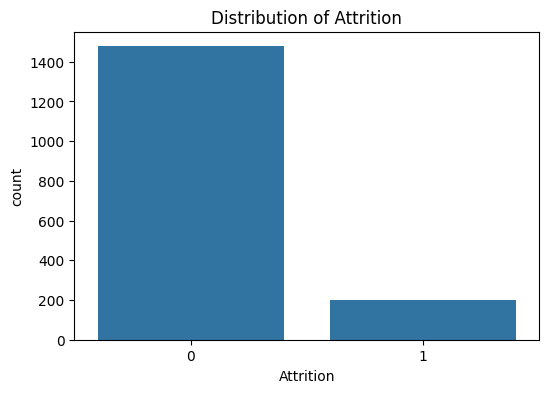

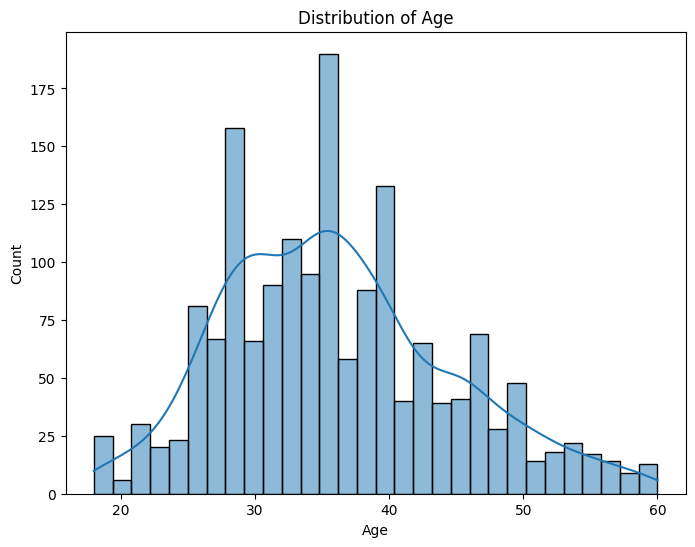

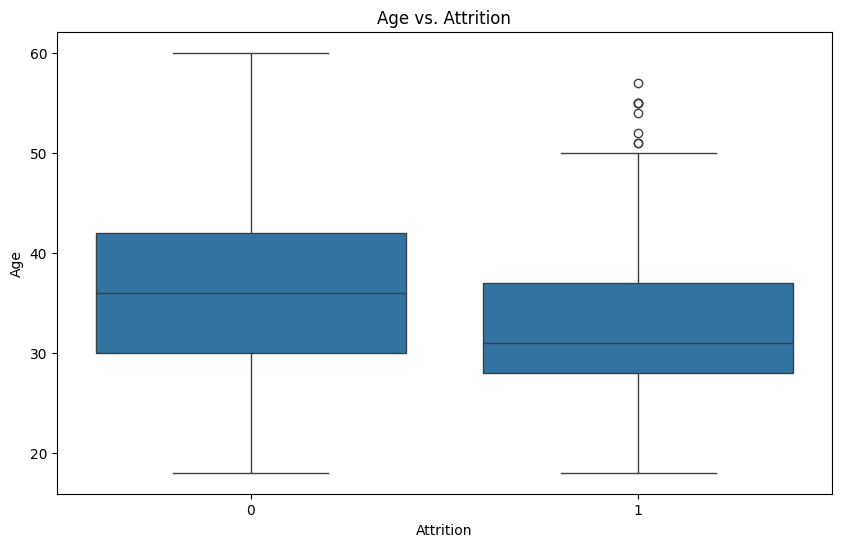

ValueError: could not convert string to float: 'Travel_Frequently'

<Figure size 1200x800 with 0 Axes>

In [5]:
# Visualize the distribution of the target variable 'Attrition' in the training dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=train_df)
plt.title('Distribution of Attrition')
plt.show()

# Explore the distribution of the 'Age' feature
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Explore the relationship between 'Age' and 'Attrition'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=train_df)
plt.title('Age vs. Attrition')
plt.show()

# Explore the correlation between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Visualization & Insight
- Use at least 5 different visuals to tell a story about the data
- Clearly document (within the notebook) 5 different insights you gained from the data

# Feature Engineering


In [8]:

# Encode categorical variables
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Apply label encoding to each categorical column
train_df_cleaned_encoded = train_df_cleaned.copy()
for column in categorical_columns:
    train_df_cleaned_encoded[column] = label_encoder.fit_transform(train_df_cleaned_encoded[column])

# Display the first few rows after encoding
print("Displaying first few rows after encoding...", train_df_cleaned_encoded.head(5))



Displaying first few rows after encoding...    id  Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   0   36               1      599.0           1                24   
1   1   35               2      921.0           2                 8   
2   2   32               2      718.0           2                26   
3   3   38               2     1488.0           1                 2   
4   4   50               2     1017.0           1                 5   

   Education  EducationField  EmployeeCount  EnvironmentSatisfaction  ...  \
0          3               3              1                        4  ...   
1          3               4              1                        1  ...   
2          3               2              1                        3  ...   
3          3               3              1                        3  ...   
4          4               3              1                        2  ...   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTim

In [ ]:
# Feature engineering
train_df_featured = train_df_cleaned_encoded.copy()

# Create a new feature 'AgeGroup' based on age ranges
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
train_df_featured['AgeGroup'] = pd.cut(train_df_featured['Age'], bins=bins, labels=labels, right=False)

# Create a new feature 'TotalSatisfaction' as the sum of satisfaction scores
satisfaction_columns = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']
train_df_featured['TotalSatisfaction'] = train_df_featured[satisfaction_columns].sum(axis=1)

# Create a new feature 'YearsInCurrentRoleGroup' based on years in the current role
bins = [0, 2, 5, 10, 20, 30, 40, 50, 100]
labels = ['0-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51+']
train_df_featured['YearsInCurrentRoleGroup'] = pd.cut(train_df_featured['YearsInCurrentRole'], bins=bins, labels=labels, right=False)

# Display the first few rows after feature engineering
print("Displaying first few rows after feature engineering...\n", train_df_featured.head(5))


# Exploratory Data Analysis

<Figure size 1600x1000 with 0 Axes>

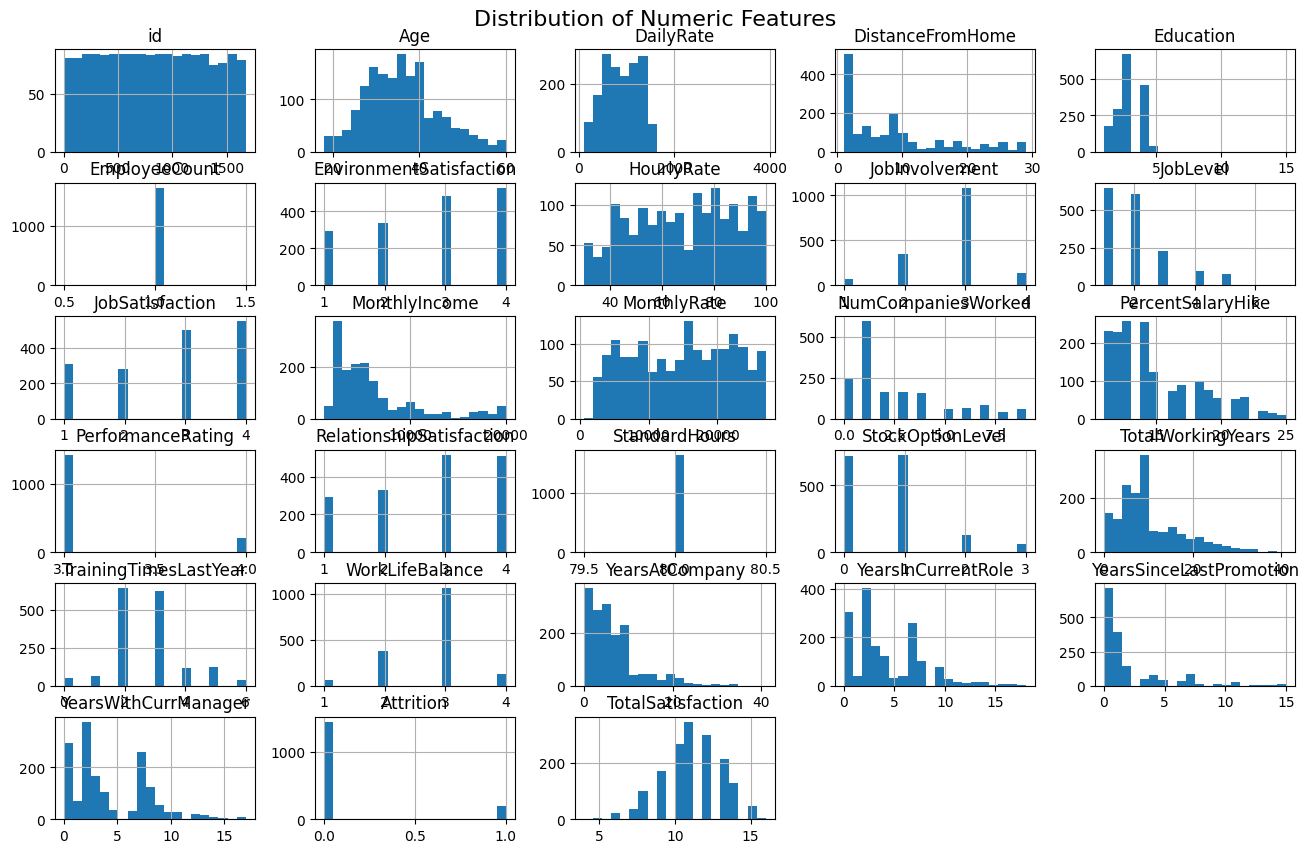

Central Tendency (Mean):
id                            831.945355
Age                            36.032787
DailyRate                     892.600486
DistanceFromHome                8.698846
Education                       2.941712
EmployeeCount                   1.000000
EnvironmentSatisfaction         2.756527
HourlyRate                     67.789921
JobInvolvement                  2.783849
JobLevel                        1.993928
JobSatisfaction                 2.789314
MonthlyIncome                6179.863995
MonthlyRate                 14797.353370
NumCompaniesWorked              2.569520
PercentSalaryHike              14.916818
PerformanceRating               3.128719
RelationshipSatisfaction        2.751670
StandardHours                  80.000000
StockOptionLevel                0.720097
TotalWorkingYears              10.710990
TrainingTimesLastYear           2.731026
WorkLifeBalance                 2.771099
YearsAtCompany                  6.836066
YearsInCurrentRole              

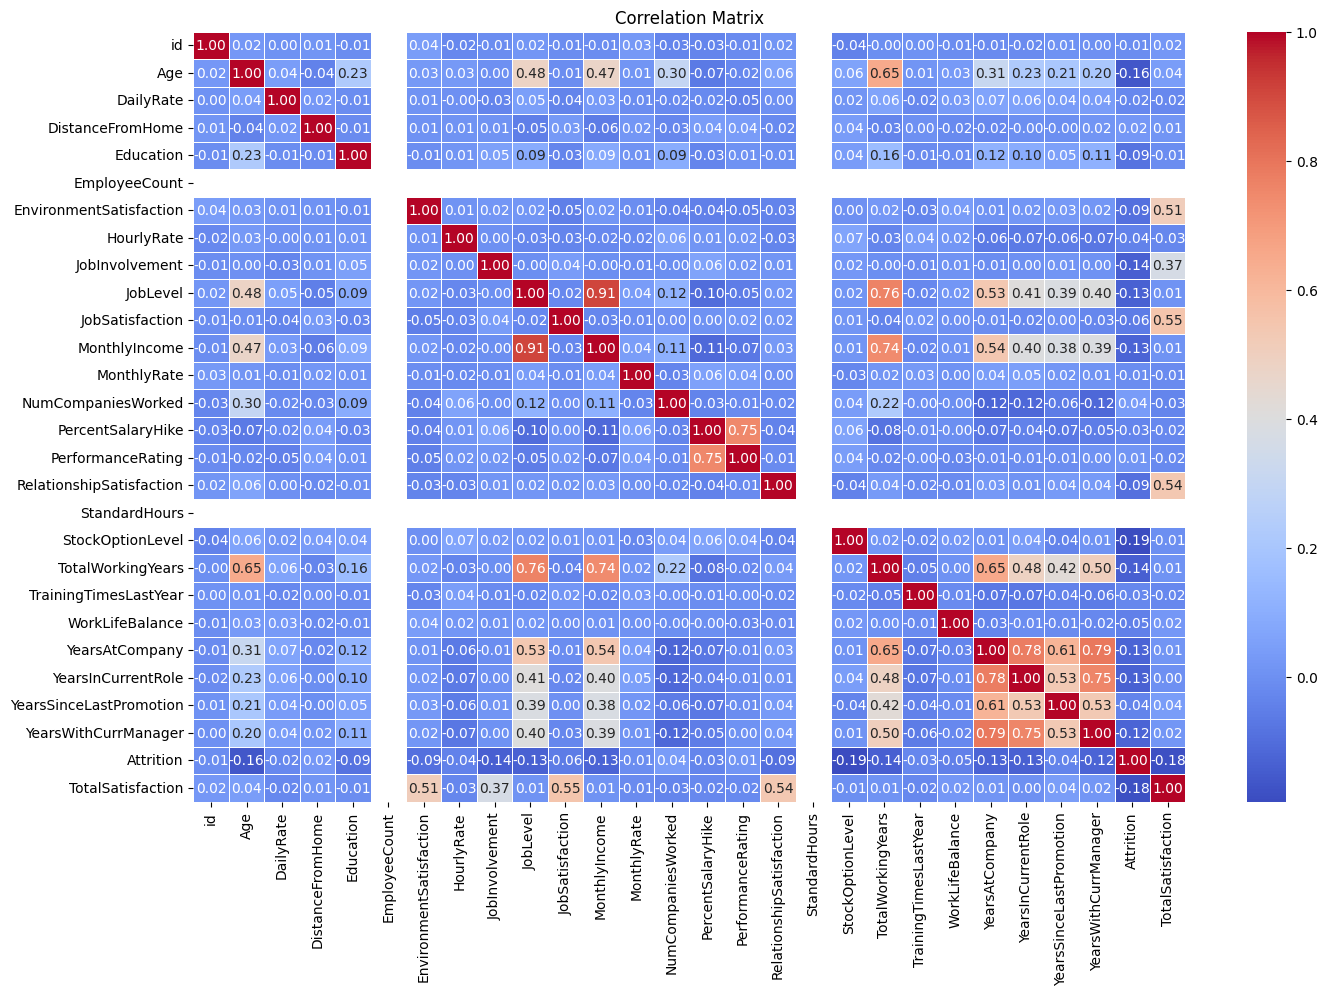


Correlation with the Target Variable (Attrition):
Attrition                   1.000000
NumCompaniesWorked          0.037064
DistanceFromHome            0.022313
PerformanceRating           0.014013
id                         -0.006540
MonthlyRate                -0.006612
DailyRate                  -0.021486
TrainingTimesLastYear      -0.025834
PercentSalaryHike          -0.029732
YearsSinceLastPromotion    -0.037884
HourlyRate                 -0.039543
WorkLifeBalance            -0.045197
JobSatisfaction            -0.061567
Education                  -0.085076
RelationshipSatisfaction   -0.091556
EnvironmentSatisfaction    -0.092169
YearsWithCurrManager       -0.124353
MonthlyIncome              -0.125044
YearsAtCompany             -0.127072
YearsInCurrentRole         -0.133870
JobLevel                   -0.134246
TotalWorkingYears          -0.137001
JobInvolvement             -0.138131
Age                        -0.160958
TotalSatisfaction          -0.180279
StockOptionLevel        

In [9]:

# Explore distribution of numeric features
numeric_columns = train_df_featured.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric features
plt.figure(figsize=(16, 10))
train_df_featured[numeric_columns].hist(bins=20, figsize=(16, 10))
plt.suptitle('Distribution of Numeric Features', x=0.5, y=0.92, fontsize=16)
plt.show()

# Calculate central tendency and dispersion measures
central_tendency = train_df_featured[numeric_columns].mean()
dispersion = train_df_featured[numeric_columns].std()

# Display central tendency and dispersion measures
print("Central Tendency (Mean):")
print(central_tendency)
print("\nDispersion (Standard Deviation):")
print(dispersion)

# Perform correlation analysis
correlation_matrix = train_df_featured[numeric_columns].corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable (Attrition)
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)

# Display correlation with the target variable
print("\nCorrelation with the Target Variable (Attrition):")
print(correlation_with_target)


# Machine Learning Model using Random Forest

In [16]:

# Split the dataset into features (X) and target variable (y)
columns_to_drop = ['Attrition', 'AgeGroup', 'YearsInCurrentRoleGroup']
X = train_df_featured.drop(columns=columns_to_drop)
y = train_df_featured['Attrition']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
random_fors_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_fors_model.fit(X_train, y_train)

# Predictions on the testing data
ran_for_pred = random_fors_model.predict(X_test)

print(ran_for_pred)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Model Evaluation


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, ran_for_pred)
conf_matrix = confusion_matrix(y_test, ran_for_pred)
classification_rep = classification_report(y_test, ran_for_pred, zero_division=1)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8455

Confusion Matrix:
[[275   2]
 [ 49   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       277
           1       0.67      0.08      0.14        53

    accuracy                           0.85       330
   macro avg       0.76      0.53      0.53       330
weighted avg       0.82      0.85      0.79       330



# Saving Model

In [14]:
import joblib

model = random_fors_model
# save the model to a .pkl file
joblib.dump(model, 'attrition_forest_model.pkl')

['attrition_forest_model.pkl']

# Conversion from .csv to .json

In [15]:
# Read the test.csv file into a DataFrame
test_df = pd.read_csv('test.csv')

# Convert DataFrame to JSON and save it to a file
test_df.to_json('test.json', orient='records')

# Deployment
- Able to deploy the ML model to cloud.
- Provides a live working URL to the deployed app.